In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
VPollos=pd.read_excel('DatosVentaPollo.xlsx')

In [122]:
VPollos.columns

Index(['Day', 'WeekDay', 'NroDay', 'Máx Temperature(°C)',
       'Mín Temperature(°C)', 'Difference Temperature', 'Feriado',
       'Pollos Enteros', '1/2 Pollo', '1/4 Pollo', '1/8 pollo',
       'Pollos Vendidos'],
      dtype='object')

In [123]:
VPollos.drop(['Day','Pollos Enteros', '1/2 Pollo', '1/4 Pollo', '1/8 pollo','Máx Temperature(°C)'],axis=1,inplace=True)

In [124]:
VPollos=VPollos[VPollos['Pollos Vendidos']!=0]

In [125]:
VPollos.head(85)

,WeekDay,NroDay,Mín Temperature(°C),Difference Temperature,Feriado,Pollos Vendidos
0,3,17,20,6,0,126
1,4,18,19,6,0,120
2,5,19,20,4,0,110
3,6,20,19,5,0,144
4,7,21,20,4,0,166
...,...,...,...,...,...,...
84,3,10,22,5,0,78
85,4,11,21,9,0,78
86,5,12,23,6,0,112
87,6,13,23,5,0,76


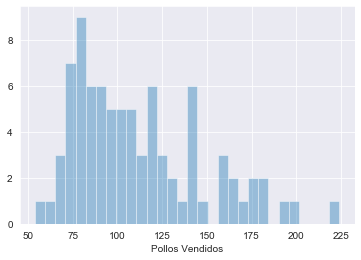

In [126]:
sns.set_style('darkgrid')
sns.distplot(VPollos['Pollos Vendidos'],kde=False,bins=30)

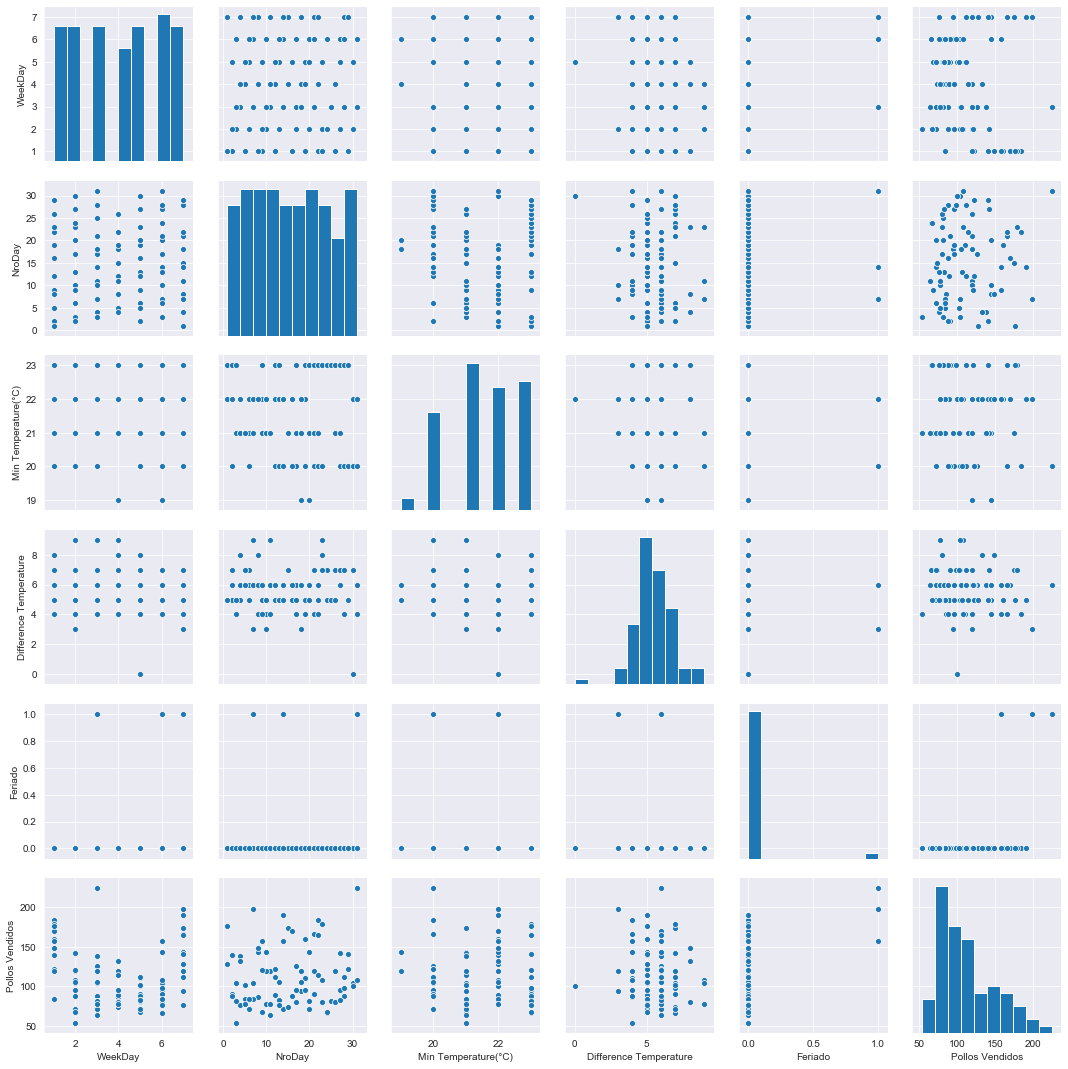

In [127]:
sns.pairplot(VPollos)

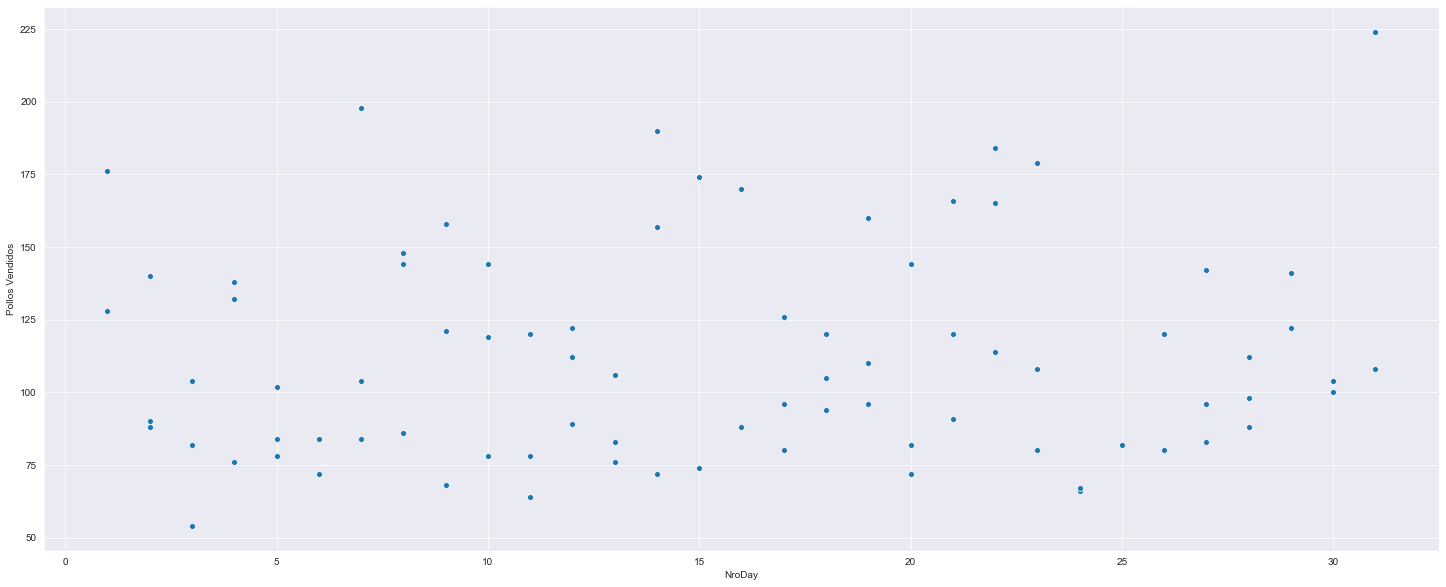

In [128]:
plt.figure(figsize=(25,10))
sns.scatterplot('NroDay','Pollos Vendidos',data=VPollos)

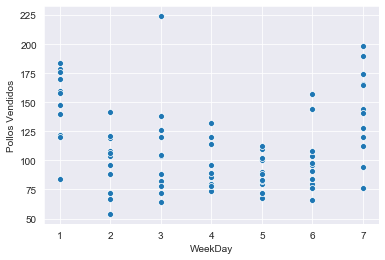

In [129]:
sns.scatterplot('WeekDay','Pollos Vendidos',data=VPollos)

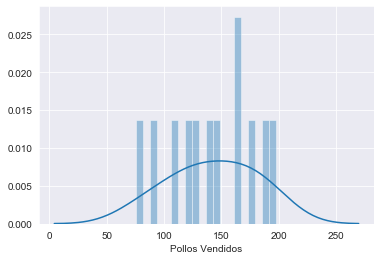

In [130]:
sns.distplot(VPollos[VPollos['WeekDay']==7]['Pollos Vendidos'],bins=20)

In [12]:
import cufflinks as cf
cf.go_offline()

In [13]:
VPollos[VPollos['WeekDay']==7]['Pollos Vendidos'].iplot(kind='hist',bins=20)

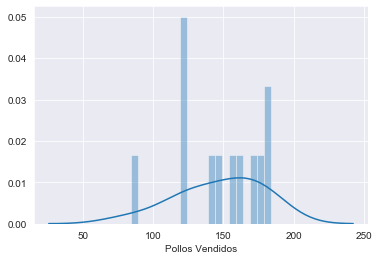

In [14]:
sns.distplot(VPollos[VPollos['WeekDay']==1]['Pollos Vendidos'],bins=20)

In [15]:
VPollos[VPollos['WeekDay']==1]['Pollos Vendidos'].iplot(kind='hist',bins=20)

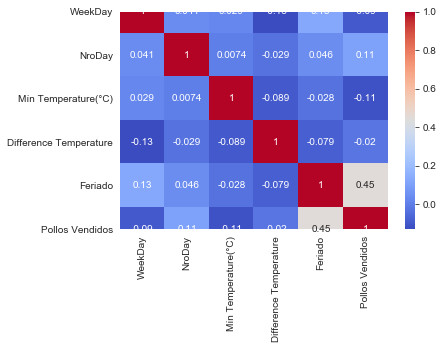

In [16]:
sns.heatmap(VPollos.corr(),cmap='coolwarm',annot=True)

In [131]:
import cufflinks as cf
cf.go_offline()

In [19]:
# VPollos.iplot(kind='box')

In [132]:
from sklearn.model_selection import train_test_split


In [236]:
X=VPollos.drop('Pollos Vendidos',axis=1)
y=VPollos['Pollos Vendidos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
LN=LinearRegression()

In [239]:
LN.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [240]:
Predictions=LN.predict(X_test)

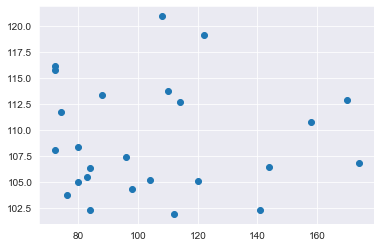

In [241]:
plt.scatter(y_test,Predictions)

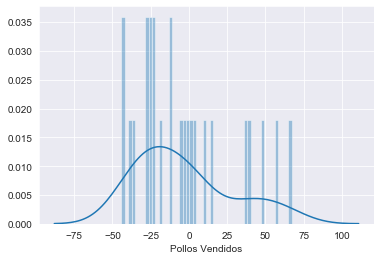

In [242]:
sns.distplot((y_test-Predictions),bins=50);

In [169]:
LN.intercept_

188.2826898806465

In [170]:
coeff_df=pd.DataFrame(LN.coef_,X.columns,columns=['Coefficients'])
print(coeff_df)

                        Coefficients
WeekDay                    -1.617859
NroDay                      0.229531
Mín Temperature(°C)        -3.598295
Difference Temperature      0.286778
Feriado                    84.697100


In [171]:
X

,WeekDay,NroDay,Mín Temperature(°C),Difference Temperature,Feriado
0,3,17,20,6,0
1,4,18,19,6,0
2,5,19,20,4,0
3,6,20,19,5,0
4,7,21,20,4,0
...,...,...,...,...,...
84,3,10,22,5,0
85,4,11,21,9,0
86,5,12,23,6,0
87,6,13,23,5,0


In [172]:
type(X['Feriado'])

pandas.core.series.Series

In [173]:
from sklearn import metrics

In [174]:
print('MAE:',metrics.mean_absolute_error(y_test,Predictions)/8)
print('MSE:', metrics.mean_squared_error(y_test, Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predictions))/8)

MAE: 3.217251947283972
MSE: 974.5292223294002
RMSE: 3.9021813257326827


In [175]:
NewPrediction=pd.read_excel('Predecir.xlsx')

In [176]:
NewPrediction.drop('Máx Temperature(°C)',axis=1,inplace=True)

In [177]:
NewPrediction.head()

,WeekDay,NroDay,Mín Temperature(°C),Difference Temperature,Feriado
0,1,15,22,4,0
1,2,16,22,4,0
2,3,17,22,4,0
3,4,18,22,4,0
4,5,19,22,4,0


In [160]:
type(NewPrediction['WeekDay'][1])

numpy.int64

In [142]:
LN.predict(NewPrediction)/8
#con 0.05 de test

array([13.93054626, 13.81800054, 13.70545482, 13.5929091 , 13.48036337,
       13.36781765, 13.25250747, 14.55267778, 14.44013206])

In [161]:
LN.predict(NewPrediction)/8
#con 0.40 de test

array([15.5720985 , 15.02843489, 14.48477127, 13.94110765, 13.39744404,
       12.85378042, 12.15298865, 15.85205607, 15.30839245])

In [313]:
#con Feriado
LN.predict(NewPrediction)/8

array([26.27832289, 13.78166772, 13.67101472, 13.0703467 , 13.44970871,
       13.18638517, 13.56574718, 14.32575325, 14.04642801])

In [178]:
#30%
LN.predict(NewPrediction)/8

array([14.01155104, 13.83801004, 13.66446904, 13.49092804, 13.31738703,
       13.14384603, 13.00615225, 14.73387205, 14.56033105])

In [196]:
from sklearn.svm import SVR

In [197]:
svrm=SVR(kernel='poly',epsilon=1,degree=3)

In [198]:
svrm.fit(X_train,y_train)

D:\Programs\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [199]:
NPredictions=svrm.predict(X_test)

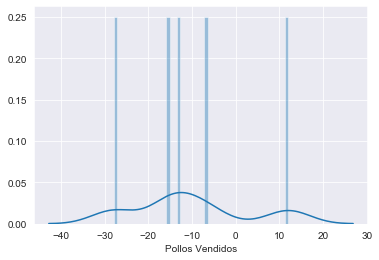

In [200]:
sns.distplot(y_test-NPredictions,bins=50)

In [201]:
print('MAE:',metrics.mean_absolute_error(y_test,NPredictions)/8)
print('MSE:', metrics.mean_squared_error(y_test, NPredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, NPredictions))/8)

MAE: 1.8720726727293109
MSE: 274.18231012633987
RMSE: 2.0698064150359716


In [193]:
#40% test
svrm.predict(NewPrediction)/8

array([19.49510419, 15.24201617, 12.21550167, 10.65594633, 10.80373575,
       12.89925555, 17.0486383 , 20.03104138, 16.01839905])

In [202]:
#0.05% test
svrm.predict(NewPrediction)/8

array([18.22835944, 13.94022227, 11.21153167, 10.1558842 , 10.88687639,
       13.51810481, 18.63183775, 19.29573643, 14.95835042])

In [185]:
#30% test
svrm.predict(NewPrediction)/8

array([19.12992008, 14.70620628, 11.65494311, 10.19654485, 10.55142578,
       12.94000018, 17.98364744, 19.65863715, 15.68147179])

In [314]:
#Con feriado #wihtout meaning
svrm.predict(NewPrediction)/8

array([24.80386486, 14.16294346, 11.31865132, 11.06842962, 11.04583771,
       12.66659523, 19.12446452, 17.58953231, 12.32763244])

In [221]:
X=VPollos.drop('Pollos Vendidos',axis=1)
y=VPollos['Pollos Vendidos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

D:\Programs\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



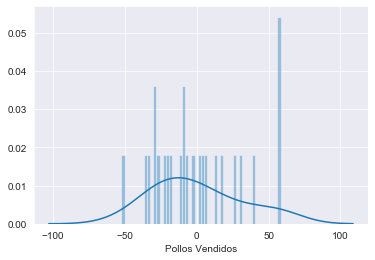

In [222]:
svrm2=SVR(kernel='poly',epsilon=1,degree=2)
svrm2.fit(X_train,y_train)
NPredictions2=svrm2.predict(X_test)
sns.distplot(y_test-NPredictions2,bins=50)

In [205]:
#40% test
svrm2.predict(NewPrediction)/8

array([15.1351241 , 13.60809353, 12.48876383, 11.77713501, 11.47320705,
       11.57697997, 11.92261646, 16.11575998, 14.6392577 ])

In [208]:
#30% test
svrm2.predict(NewPrediction)/8

array([12.95851448, 11.82519866, 11.24257908, 11.21065574, 11.72942863,
       12.79889775, 13.97958989, 14.86816501, 13.33077975])

In [211]:
#0.05% test
svrm2.predict(NewPrediction)/8

array([14.50260548, 12.74799397, 11.71163819, 11.39353817, 11.79369389,
       12.91210535, 14.3201301 , 15.4383136 , 13.59948641])

In [212]:
print('MAE:',metrics.mean_absolute_error(y_test,NPredictions2)/8)
print('MSE:', metrics.mean_squared_error(y_test, NPredictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, NPredictions2))/8)

MAE: 2.8470407889296383
MSE: 828.5718519485654
RMSE: 3.5981155049131393


In [52]:
error=[]
for i in range(1,5):
    svrmN=SVR(kernel='poly',epsilon=1,degree=i)
    svrmN.fit(X_train,y_train)
    NPredict=svrmN.predict(X_test)
    error.append(np.sqrt(metrics.mean_squared_error(y_test, NPredict))/8)
    

D:\Programs\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

D:\Programs\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

D:\Programs\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

D:\Programs\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Se

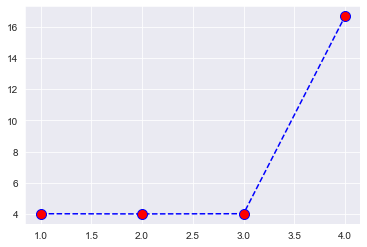

In [53]:
plt.plot(range(1,5),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [213]:
error

[4.019238751773411, 4.007552600073127, 4.021105321903828, 16.665399378600707]

In [214]:
from sklearn.model_selection import GridSearchCV

In [223]:
params={'C':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],'gamma':[1 ,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001],'kernel':['rbf'],'epsilon':[0.1,1,10,100,1000]}
grsearch=GridSearchCV(SVR(),params,refit=True,verbose=5)
grsearch.fit(X_train,y_train)

D:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV] C=0.0001, epsilon=0.1, gamma=1, kernel=rbf ......................
[CV]  C=0.0001, epsilon=0.1, gamma=1, kernel=rbf, score=-0.068, total=   0.0s
[CV] C=0.0001, epsilon=0.1, gamma=1, kernel=rbf ......................
[CV]  C=0.0001, epsilon=0.1, gamma=1, kernel=rbf, score=-0.226, total=   0.0s
[CV] C=0.0001, epsilon=0.1, gamma=1, kernel=rbf ......................
[CV]  C=0.0001, epsilon=0.1, gamma=1, kernel=rbf, score=-0.159, total=   0.0s
[CV] C=0.0001, epsilon=0.1, gamma=0.1, kernel=rbf ....................
[CV]  C=0.0001, epsilon=0.1, gamma=0.1, kernel=rbf, score=-0.068, total=   0.0s
[CV] C=0.0001, epsilon=0.1, gamma=0.1, kernel=rbf ....................
[CV]  C=0.0001, epsilon=0.1, gamma=0.1, kernel=rbf, score=-0.226, total=   0.0s
[CV] C=0.0001, epsilon=0.1, gamma=0.1, kernel=rbf ....................
[CV]  C=0.0001, epsilon=0.1, gamma=0.1, kernel=rbf, score=-0.159, total=   0.0s
[CV] C=0.0001, epsilon=0.1, gamma=0.

[CV]  C=0.0001, epsilon=10, gamma=0.1, kernel=rbf, score=-0.211, total=   0.0s
[CV] C=0.0001, epsilon=10, gamma=0.1, kernel=rbf .....................
[CV]  C=0.0001, epsilon=10, gamma=0.1, kernel=rbf, score=-0.127, total=   0.0s
[CV] C=0.0001, epsilon=10, gamma=0.01, kernel=rbf ....................
[CV]  C=0.0001, epsilon=10, gamma=0.01, kernel=rbf, score=-0.027, total=   0.0s
[CV] C=0.0001, epsilon=10, gamma=0.01, kernel=rbf ....................
[CV]  C=0.0001, epsilon=10, gamma=0.01, kernel=rbf, score=-0.211, total=   0.0s
[CV] C=0.0001, epsilon=10, gamma=0.01, kernel=rbf ....................
[CV]  C=0.0001, epsilon=10, gamma=0.01, kernel=rbf, score=-0.127, total=   0.0s
[CV] C=0.0001, epsilon=10, gamma=0.001, kernel=rbf ...................
[CV]  C=0.0001, epsilon=10, gamma=0.001, kernel=rbf, score=-0.027, total=   0.0s
[CV] C=0.0001, epsilon=10, gamma=0.001, kernel=rbf ...................
[CV]  C=0.0001, epsilon=10, gamma=0.001, kernel=rbf, score=-0.211, total=   0.0s
[CV] C=0.0001,

[CV]  C=0.0001, epsilon=1000, gamma=0.1, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=0.0001, epsilon=1000, gamma=0.01, kernel=rbf ..................
[CV]  C=0.0001, epsilon=1000, gamma=0.01, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=0.0001, epsilon=1000, gamma=0.01, kernel=rbf ..................
[CV]  C=0.0001, epsilon=1000, gamma=0.01, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=0.0001, epsilon=1000, gamma=0.01, kernel=rbf ..................
[CV]  C=0.0001, epsilon=1000, gamma=0.01, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=0.0001, epsilon=1000, gamma=0.001, kernel=rbf .................
[CV]  C=0.0001, epsilon=1000, gamma=0.001, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=0.0001, epsilon=1000, gamma=0.001, kernel=rbf .................
[CV]  C=0.0001, epsilon=1000, gamma=0.001, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=0.0001, epsilon=1000, gamma=0.001, kernel=rbf .................
[CV]  C=0.0001, epsilon=1000, gamma=0.001, kernel=rbf, score=-0.000, total=   0.0

[CV]  C=0.001, epsilon=100, gamma=0.01, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=0.001, epsilon=100, gamma=0.01, kernel=rbf ....................
[CV]  C=0.001, epsilon=100, gamma=0.01, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=0.001, epsilon=100, gamma=0.01, kernel=rbf ....................
[CV]  C=0.001, epsilon=100, gamma=0.01, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=0.001, epsilon=100, gamma=0.001, kernel=rbf ...................
[CV]  C=0.001, epsilon=100, gamma=0.001, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=0.001, epsilon=100, gamma=0.001, kernel=rbf ...................
[CV]  C=0.001, epsilon=100, gamma=0.001, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=0.001, epsilon=100, gamma=0.001, kernel=rbf ...................
[CV]  C=0.001, epsilon=100, gamma=0.001, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=0.001, epsilon=100, gamma=0.0001, kernel=rbf ..................
[CV]  C=0.001, epsilon=100, gamma=0.0001, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=0.

[CV] C=0.01, epsilon=0.1, gamma=0.001, kernel=rbf ....................
[CV]  C=0.01, epsilon=0.1, gamma=0.001, kernel=rbf, score=-0.226, total=   0.0s
[CV] C=0.01, epsilon=0.1, gamma=0.001, kernel=rbf ....................
[CV]  C=0.01, epsilon=0.1, gamma=0.001, kernel=rbf, score=-0.159, total=   0.0s
[CV] C=0.01, epsilon=0.1, gamma=0.0001, kernel=rbf ...................
[CV]  C=0.01, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.068, total=   0.0s
[CV] C=0.01, epsilon=0.1, gamma=0.0001, kernel=rbf ...................
[CV]  C=0.01, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.226, total=   0.0s
[CV] C=0.01, epsilon=0.1, gamma=0.0001, kernel=rbf ...................
[CV]  C=0.01, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.159, total=   0.0s
[CV] C=0.01, epsilon=0.1, gamma=1e-05, kernel=rbf ....................
[CV]  C=0.01, epsilon=0.1, gamma=1e-05, kernel=rbf, score=-0.068, total=   0.0s
[CV] C=0.01, epsilon=0.1, gamma=1e-05, kernel=rbf ....................
[CV]  C=0.01, epsilo

[CV]  C=0.01, epsilon=10, gamma=0.0001, kernel=rbf, score=-0.127, total=   0.0s
[CV] C=0.01, epsilon=10, gamma=1e-05, kernel=rbf .....................
[CV]  C=0.01, epsilon=10, gamma=1e-05, kernel=rbf, score=-0.027, total=   0.0s
[CV] C=0.01, epsilon=10, gamma=1e-05, kernel=rbf .....................
[CV]  C=0.01, epsilon=10, gamma=1e-05, kernel=rbf, score=-0.211, total=   0.0s
[CV] C=0.01, epsilon=10, gamma=1e-05, kernel=rbf .....................
[CV]  C=0.01, epsilon=10, gamma=1e-05, kernel=rbf, score=-0.127, total=   0.0s
[CV] C=0.01, epsilon=10, gamma=1e-06, kernel=rbf .....................
[CV]  C=0.01, epsilon=10, gamma=1e-06, kernel=rbf, score=-0.027, total=   0.0s
[CV] C=0.01, epsilon=10, gamma=1e-06, kernel=rbf .....................
[CV]  C=0.01, epsilon=10, gamma=1e-06, kernel=rbf, score=-0.211, total=   0.0s
[CV] C=0.01, epsilon=10, gamma=1e-06, kernel=rbf .....................
[CV]  C=0.01, epsilon=10, gamma=1e-06, kernel=rbf, score=-0.127, total=   0.0s
[CV] C=0.01, epsilon

[CV]  C=0.01, epsilon=1000, gamma=1e-05, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=0.01, epsilon=1000, gamma=1e-06, kernel=rbf ...................
[CV]  C=0.01, epsilon=1000, gamma=1e-06, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=0.01, epsilon=1000, gamma=1e-06, kernel=rbf ...................
[CV]  C=0.01, epsilon=1000, gamma=1e-06, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=0.01, epsilon=1000, gamma=1e-06, kernel=rbf ...................
[CV]  C=0.01, epsilon=1000, gamma=1e-06, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=0.01, epsilon=1000, gamma=1e-07, kernel=rbf ...................
[CV]  C=0.01, epsilon=1000, gamma=1e-07, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=0.01, epsilon=1000, gamma=1e-07, kernel=rbf ...................
[CV]  C=0.01, epsilon=1000, gamma=1e-07, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=0.01, epsilon=1000, gamma=1e-07, kernel=rbf ...................
[CV]  C=0.01, epsilon=1000, gamma=1e-07, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=

[CV]  C=0.1, epsilon=1, gamma=1e-06, kernel=rbf, score=-0.068, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1e-06, kernel=rbf .......................
[CV]  C=0.1, epsilon=1, gamma=1e-06, kernel=rbf, score=-0.226, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1e-06, kernel=rbf .......................
[CV]  C=0.1, epsilon=1, gamma=1e-06, kernel=rbf, score=-0.152, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1e-07, kernel=rbf .......................
[CV]  C=0.1, epsilon=1, gamma=1e-07, kernel=rbf, score=-0.068, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1e-07, kernel=rbf .......................
[CV]  C=0.1, epsilon=1, gamma=1e-07, kernel=rbf, score=-0.226, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1e-07, kernel=rbf .......................
[CV]  C=0.1, epsilon=1, gamma=1e-07, kernel=rbf, score=-0.152, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1e-08, kernel=rbf .......................
[CV]  C=0.1, epsilon=1, gamma=1e-08, kernel=rbf, score=-0.068, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1e-08,

[CV]  C=1, epsilon=0.1, gamma=1e-08, kernel=rbf, score=-0.159, total=   0.0s
[CV] C=1, epsilon=1, gamma=1, kernel=rbf .............................
[CV]  C=1, epsilon=1, gamma=1, kernel=rbf, score=-0.068, total=   0.0s
[CV] C=1, epsilon=1, gamma=1, kernel=rbf .............................
[CV]  C=1, epsilon=1, gamma=1, kernel=rbf, score=-0.243, total=   0.0s
[CV] C=1, epsilon=1, gamma=1, kernel=rbf .............................
[CV]  C=1, epsilon=1, gamma=1, kernel=rbf, score=-0.159, total=   0.0s
[CV] C=1, epsilon=1, gamma=0.1, kernel=rbf ...........................
[CV]  C=1, epsilon=1, gamma=0.1, kernel=rbf, score=-0.069, total=   0.0s
[CV] C=1, epsilon=1, gamma=0.1, kernel=rbf ...........................
[CV]  C=1, epsilon=1, gamma=0.1, kernel=rbf, score=-0.266, total=   0.0s
[CV] C=1, epsilon=1, gamma=0.1, kernel=rbf ...........................
[CV]  C=1, epsilon=1, gamma=0.1, kernel=rbf, score=-0.159, total=   0.0s
[CV] C=1, epsilon=1, gamma=0.01, kernel=rbf .....................

[CV]  C=1, epsilon=100, gamma=0.01, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=1, epsilon=100, gamma=0.01, kernel=rbf ........................
[CV]  C=1, epsilon=100, gamma=0.01, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=1, epsilon=100, gamma=0.001, kernel=rbf .......................
[CV]  C=1, epsilon=100, gamma=0.001, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=1, epsilon=100, gamma=0.001, kernel=rbf .......................
[CV]  C=1, epsilon=100, gamma=0.001, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=1, epsilon=100, gamma=0.001, kernel=rbf .......................
[CV]  C=1, epsilon=100, gamma=0.001, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=1, epsilon=100, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, epsilon=100, gamma=0.0001, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=1, epsilon=100, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, epsilon=100, gamma=0.0001, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=1, epsilon=100, gamma=0.0001

[CV] C=10, epsilon=0.1, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.074, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.261, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.161, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=1e-05, kernel=rbf ......................
[CV]  C=10, epsilon=0.1, gamma=1e-05, kernel=rbf, score=-0.069, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=1e-05, kernel=rbf ......................
[CV]  C=10, epsilon=0.1, gamma=1e-05, kernel=rbf, score=-0.230, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=1e-05, kernel=rbf ......................
[CV]  C=10, epsilon=0.1, gamma=1e-05, kernel=rbf, score=-0.159, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=1e-06, kernel=rbf ......................
[CV]  C=10, epsilon=0.1, gamma=1

[CV]  C=10, epsilon=10, gamma=1e-05, kernel=rbf, score=-0.027, total=   0.0s
[CV] C=10, epsilon=10, gamma=1e-05, kernel=rbf .......................
[CV]  C=10, epsilon=10, gamma=1e-05, kernel=rbf, score=-0.211, total=   0.0s
[CV] C=10, epsilon=10, gamma=1e-05, kernel=rbf .......................
[CV]  C=10, epsilon=10, gamma=1e-05, kernel=rbf, score=-0.127, total=   0.0s
[CV] C=10, epsilon=10, gamma=1e-06, kernel=rbf .......................
[CV]  C=10, epsilon=10, gamma=1e-06, kernel=rbf, score=-0.027, total=   0.0s
[CV] C=10, epsilon=10, gamma=1e-06, kernel=rbf .......................
[CV]  C=10, epsilon=10, gamma=1e-06, kernel=rbf, score=-0.211, total=   0.0s
[CV] C=10, epsilon=10, gamma=1e-06, kernel=rbf .......................
[CV]  C=10, epsilon=10, gamma=1e-06, kernel=rbf, score=-0.127, total=   0.0s
[CV] C=10, epsilon=10, gamma=1e-07, kernel=rbf .......................
[CV]  C=10, epsilon=10, gamma=1e-07, kernel=rbf, score=-0.027, total=   0.0s
[CV] C=10, epsilon=10, gamma=1e-07,

[CV]  C=10, epsilon=1000, gamma=1e-06, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=10, epsilon=1000, gamma=1e-06, kernel=rbf .....................
[CV]  C=10, epsilon=1000, gamma=1e-06, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=10, epsilon=1000, gamma=1e-06, kernel=rbf .....................
[CV]  C=10, epsilon=1000, gamma=1e-06, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=10, epsilon=1000, gamma=1e-07, kernel=rbf .....................
[CV]  C=10, epsilon=1000, gamma=1e-07, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=10, epsilon=1000, gamma=1e-07, kernel=rbf .....................
[CV]  C=10, epsilon=1000, gamma=1e-07, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=10, epsilon=1000, gamma=1e-07, kernel=rbf .....................
[CV]  C=10, epsilon=1000, gamma=1e-07, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=10, epsilon=1000, gamma=1e-08, kernel=rbf .....................
[CV]  C=10, epsilon=1000, gamma=1e-08, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=10, epsilon=10

[CV]  C=100, epsilon=1, gamma=1e-08, kernel=rbf, score=-0.068, total=   0.0s
[CV] C=100, epsilon=1, gamma=1e-08, kernel=rbf .......................
[CV]  C=100, epsilon=1, gamma=1e-08, kernel=rbf, score=-0.226, total=   0.0s
[CV] C=100, epsilon=1, gamma=1e-08, kernel=rbf .......................
[CV]  C=100, epsilon=1, gamma=1e-08, kernel=rbf, score=-0.152, total=   0.0s
[CV] C=100, epsilon=10, gamma=1, kernel=rbf ..........................
[CV]  C=100, epsilon=10, gamma=1, kernel=rbf, score=-0.133, total=   0.0s
[CV] C=100, epsilon=10, gamma=1, kernel=rbf ..........................
[CV]  C=100, epsilon=10, gamma=1, kernel=rbf, score=-0.006, total=   0.0s
[CV] C=100, epsilon=10, gamma=1, kernel=rbf ..........................
[CV]  C=100, epsilon=10, gamma=1, kernel=rbf, score=-0.060, total=   0.0s
[CV] C=100, epsilon=10, gamma=0.1, kernel=rbf ........................
[CV]  C=100, epsilon=10, gamma=0.1, kernel=rbf, score=-0.293, total=   0.0s
[CV] C=100, epsilon=10, gamma=0.1, kernel=rbf

[CV] C=100, epsilon=1000, gamma=1, kernel=rbf ........................
[CV]  C=100, epsilon=1000, gamma=1, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=100, epsilon=1000, gamma=1, kernel=rbf ........................
[CV]  C=100, epsilon=1000, gamma=1, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=100, epsilon=1000, gamma=0.1, kernel=rbf ......................
[CV]  C=100, epsilon=1000, gamma=0.1, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=100, epsilon=1000, gamma=0.1, kernel=rbf ......................
[CV]  C=100, epsilon=1000, gamma=0.1, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=100, epsilon=1000, gamma=0.1, kernel=rbf ......................
[CV]  C=100, epsilon=1000, gamma=0.1, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=100, epsilon=1000, gamma=0.01, kernel=rbf .....................
[CV]  C=100, epsilon=1000, gamma=0.01, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=100, epsilon=1000, gamma=0.01, kernel=rbf .....................
[CV]  C=100, epsilon=1000, gamma=0.01,

[CV]  C=1000, epsilon=1, gamma=0.1, kernel=rbf, score=-0.521, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.01, kernel=rbf .......................
[CV]  C=1000, epsilon=1, gamma=0.01, kernel=rbf, score=-0.599, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.01, kernel=rbf .......................
[CV]  C=1000, epsilon=1, gamma=0.01, kernel=rbf, score=-1.683, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.01, kernel=rbf .......................
[CV]  C=1000, epsilon=1, gamma=0.01, kernel=rbf, score=-0.419, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.001, kernel=rbf ......................
[CV]  C=1000, epsilon=1, gamma=0.001, kernel=rbf, score=-0.451, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.001, kernel=rbf ......................
[CV]  C=1000, epsilon=1, gamma=0.001, kernel=rbf, score=-0.486, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.001, kernel=rbf ......................
[CV]  C=1000, epsilon=1, gamma=0.001, kernel=rbf, score=-0.155, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.0

[CV]  C=1000, epsilon=100, gamma=0.001, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=1000, epsilon=100, gamma=0.0001, kernel=rbf ...................
[CV]  C=1000, epsilon=100, gamma=0.0001, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=1000, epsilon=100, gamma=0.0001, kernel=rbf ...................
[CV]  C=1000, epsilon=100, gamma=0.0001, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=1000, epsilon=100, gamma=0.0001, kernel=rbf ...................
[CV]  C=1000, epsilon=100, gamma=0.0001, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=1000, epsilon=100, gamma=1e-05, kernel=rbf ....................
[CV]  C=1000, epsilon=100, gamma=1e-05, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=1000, epsilon=100, gamma=1e-05, kernel=rbf ....................
[CV]  C=1000, epsilon=100, gamma=1e-05, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=1000, epsilon=100, gamma=1e-05, kernel=rbf ....................
[CV]  C=1000, epsilon=100, gamma=1e-05, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=1000

[CV]  C=10000, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.520, total=   0.0s
[CV] C=10000, epsilon=0.1, gamma=0.0001, kernel=rbf ..................
[CV]  C=10000, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.375, total=   0.0s
[CV] C=10000, epsilon=0.1, gamma=0.0001, kernel=rbf ..................
[CV]  C=10000, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.177, total=   0.0s
[CV] C=10000, epsilon=0.1, gamma=1e-05, kernel=rbf ...................
[CV]  C=10000, epsilon=0.1, gamma=1e-05, kernel=rbf, score=-0.165, total=   0.0s
[CV] C=10000, epsilon=0.1, gamma=1e-05, kernel=rbf ...................
[CV]  C=10000, epsilon=0.1, gamma=1e-05, kernel=rbf, score=-0.405, total=   0.0s
[CV] C=10000, epsilon=0.1, gamma=1e-05, kernel=rbf ...................
[CV]  C=10000, epsilon=0.1, gamma=1e-05, kernel=rbf, score=-0.190, total=   0.0s
[CV] C=10000, epsilon=0.1, gamma=1e-06, kernel=rbf ...................
[CV]  C=10000, epsilon=0.1, gamma=1e-06, kernel=rbf, score=-0.124, total=   0.0s
[CV]

[CV]  C=10000, epsilon=1000, gamma=0.0001, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=10000, epsilon=1000, gamma=0.0001, kernel=rbf .................
[CV]  C=10000, epsilon=1000, gamma=0.0001, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=10000, epsilon=1000, gamma=0.0001, kernel=rbf .................
[CV]  C=10000, epsilon=1000, gamma=0.0001, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=10000, epsilon=1000, gamma=1e-05, kernel=rbf ..................
[CV]  C=10000, epsilon=1000, gamma=1e-05, kernel=rbf, score=-1.161, total=   0.0s
[CV] C=10000, epsilon=1000, gamma=1e-05, kernel=rbf ..................
[CV]  C=10000, epsilon=1000, gamma=1e-05, kernel=rbf, score=-0.627, total=   0.0s
[CV] C=10000, epsilon=1000, gamma=1e-05, kernel=rbf ..................
[CV]  C=10000, epsilon=1000, gamma=1e-05, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=10000, epsilon=1000, gamma=1e-06, kernel=rbf ..................
[CV]  C=10000, epsilon=1000, gamma=1e-06, kernel=rbf, score=-1.161, total=   0.

[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:    3.9s finished
D:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'epsilon': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [224]:
grsearch.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [225]:
grsearch.score

<bound method BaseSearchCV.score of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'epsilon': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)>

In [226]:
NPredictions=grsearch.predict(X_test)

In [227]:
print('MAE:',metrics.mean_absolute_error(y_test,NPredictions)/8)
print('MSE:', metrics.mean_squared_error(y_test, NPredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, NPredictions))/8)

MAE: 3.326377010722749
MSE: 979.3953074293145
RMSE: 3.9119115121105485


In [228]:
grsearch.predict(NewPrediction)/8

array([14.29026846, 14.29030014, 14.28239156, 14.19259116, 14.01282589,
       14.11442068, 14.63971265, 14.37073334, 14.3063511 ])

In [229]:
X=VPollos.drop('Pollos Vendidos',axis=1)
y=VPollos['Pollos Vendidos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

In [230]:
nsvr=SVR()
nsvr.fit(X_train,y_train)
PR1=nsvr.predict(X_test)
print('MAE:',metrics.mean_absolute_error(y_test,PR1)/8)
print('MSE:', metrics.mean_squared_error(y_test, PR1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, PR1))/8)

MAE: 3.1009470570167115
MSE: 930.1287311241817
RMSE: 3.81225149010599


D:\Programs\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [231]:
nsvr.predict(NewPrediction)/8

array([13.04014975, 13.05466029, 13.05608764, 12.98101086, 12.91106033,
       12.96664064, 13.06718317, 13.1513993 , 13.09821254])

In [235]:
X=VPollos.drop('Pollos Vendidos',axis=1)
y=VPollos['Pollos Vendidos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)
nsvr=SVR()
nsvr.fit(X_train,y_train)
PR1=nsvr.predict(X_test)
nsvr.predict(NewPrediction)/8

D:\Programs\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



array([13.04014975, 13.05466029, 13.05608764, 12.98101086, 12.91106033,
       12.96664064, 13.06718317, 13.1513993 , 13.09821254])